In [1]:
import sys, os
sys.path.append('F:\\python\\ml\\MachineLearning\\src')
import LinearData_1D
import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

# create 1D linear data set

In [2]:
filename1 = 'LinearData_1D_WithNoise_1'
generator = LinearData_1D.Generator1D_WhiteNoise([2.1, 3.4], 100, [0.0, 20.0], 1.0, filename1)
if not os.path.exists('../data/'+filename1+'.csv'):
    generator.generate()

In [3]:
data = pd.read_csv('../data/'+filename1+'.csv')
X = data['X'].values
Y = data['Y'].values
if len(X.shape) == 1:
    N = X.shape[0]
    X = X.reshape((N, 1))

# Use matrix inverse analytic calculation method to regress and plot

In [4]:
# regression results
regressor1 = LinearRegression.LS_Matrix(X, Y, True)
regressor1.regress()
Y0 = regressor1.predict(X)

In [5]:
# real underlying model predictions
Y_real = X[:,0] * 2.1 + 3.4

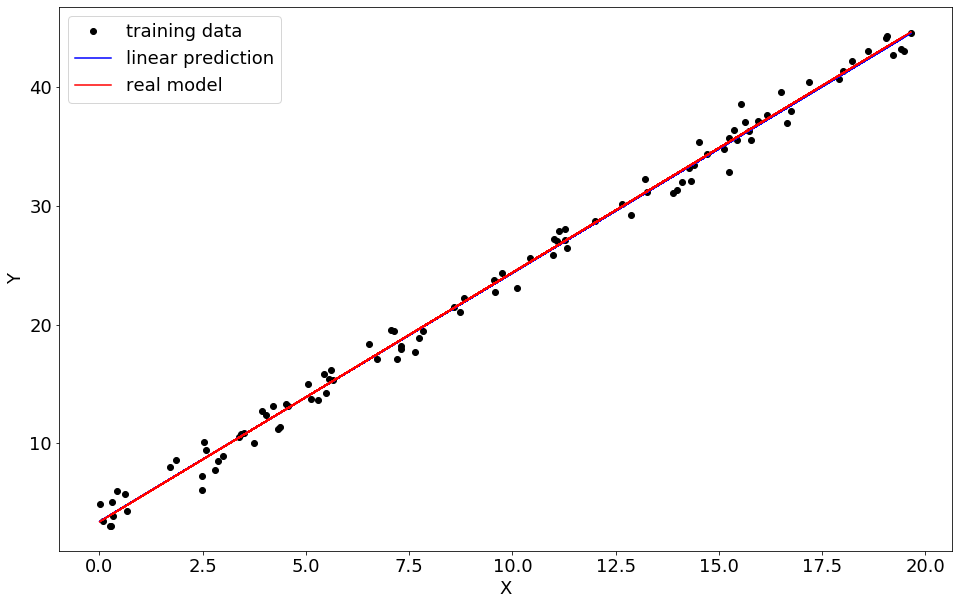

In [6]:
# do plot here
plt.figure(num=1, figsize = (16,10))
p1, = plt.plot(X, Y, 'ko')
p2, = plt.plot(X, Y0, 'b-')
p3, = plt.plot(X, Y_real, 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([p1,p2,p3], ['training data', 'linear prediction', 'real model'])